# Metoda poszukiwania pierwiastków wykorzystująca przedział i zmianę znaku.

In [ ]:
Pkg.add("Roots")
Pkg.add("ForwardDiff")
Pkg.add("SpecialFunctions")

In [65]:
using Roots  
using Plots
using ForwardDiff
using DataFrames
using SpecialFunctions
using Images

In [63]:
function newton_baffler(x)
    if ( x - 0.0 ) < -0.25
        0.75 * ( x - 0 ) - 0.3125
    elseif  ( x - 0 ) < 0.25
        2.0 * ( x - 0 )
    else
        0.75 * ( x - 0 ) + 0.3125
    end
end

f10 = x -> 20.0 * x / ( 100.0 * x * x + 1.0 )
f19 = x -> cos( 100.0 * x ) - 4.0 * erf( 30.0 * x - 10.0 )


#63 (generic function with 1 method)

In [64]:
f = [ x -> sin(x) - x/2,
      x -> 2 * x - exp(-x),
      x -> (x + 3) * (x - 1)^2,
      x -> x * exp(-x),
      x -> exp(x) - 2 - 1 / (10 * x)^2 + 2 / (100 * x)^3,
      newton_baffler,
      f10,
      f19]

8-element Array{Function,1}:
 getfield(Main, Symbol("##65#70"))()
 getfield(Main, Symbol("##66#71"))()
 getfield(Main, Symbol("##67#72"))()
 getfield(Main, Symbol("##68#73"))()
 getfield(Main, Symbol("##69#74"))()
 newton_baffler                     
 getfield(Main, Symbol("##61#62"))()
 getfield(Main, Symbol("##63#64"))()

In [35]:
function getDf(rd, x, f) 
    s = readavailable(rd)
    napis = String(s)
    getRow(napis, x, f)
end

getDf (generic function with 1 method)

In [36]:
function getRow(napis, x, f) 
    DataFrame(
        Algorithm = (match(r"(?<=Algorithm: )([^()]*)", napis)).match,
        No = f,
        Iterations = (match(r"(?<=iterations: )(\d+)", napis)).match,
        Evaluations = (match(r"(?<=evaluations: )(\d+)", napis)).match,
        Root = x
    )
end

getRow (generic function with 1 method)

In [50]:
function is_zerro(f, x)
    (f(prevfloat(x)) * f(x) < 0.0) || (f(x) * f(nextfloat(x)) < 0.0) || iszero(f(x)) || abs(f(x)) < 0.00001
end

is_zerro (generic function with 1 method)

In [51]:
rd, wr = redirect_stdout()
D(f) = x->ForwardDiff.derivative(f, float(x))

df = DataFrame(Algorithm = String[], No = Int64[], Iterations = String[], Evaluations = String[], Root = Float64[])
dfError = DataFrame(Algorithm = String[], No = Float64[], Err = String[])
for i = 1:8
    try
        x = find_zero(f[i], (-10, +10), verbose=true)
        is_zerro(f[i], x) ? append!(df, getDf(rd, x, i)) : throw()
    catch error
        append!(dfError, DataFrame(Algorithm = "Roots.BisectionExact", No = i, Err = sprint(showerror, error)))
    end
end
for i = 1:8
    try
        x = find_zero((f[i], D(f[i])),-10, Roots.Newton(),verbose=true)
        is_zerro(f[i], x) ? append!(df, getDf(rd, x, i)) : throw()
    catch error
        append!(dfError, DataFrame(Algorithm = "Roots.Newton", No = i, Err = sprint(showerror, error)))
    end    
end 
for i = 1:8
    try
        x = find_zero(f[i], -10, Order1(),  verbose=true)
        is_zerro(f[i], x) ? append!(df, getDf(rd, x, i)) : throw()
    catch error
        append!(dfError, DataFrame(Algorithm = "Roots.Secant", No = i, Err = sprint(showerror, error)))
    end       
end

df, dfError

(18×5 DataFrame
│ Row │ Algorithm            │ No    │ Iterations │ Evaluations │ Root         │
│     │ String               │ Int64 │ String     │ String      │ Float64      │
├─────┼──────────────────────┼───────┼────────────┼─────────────┼──────────────┤
│ 1   │ Roots.BisectionExact │ 1     │ 0          │ 2           │ 0.0          │
│ 2   │ Roots.BisectionExact │ 2     │ 61         │ 63          │ 0.351734     │
│ 3   │ Roots.BisectionExact │ 3     │ 58         │ 60          │ -3.0         │
│ 4   │ Roots.BisectionExact │ 4     │ 0          │ 2           │ 0.0          │
│ 5   │ Roots.BisectionExact │ 6     │ 0          │ 2           │ 0.0          │
│ 6   │ Roots.BisectionExact │ 7     │ 0          │ 2           │ 0.0          │
│ 7   │ Roots.BisectionExact │ 8     │ 62         │ 64          │ 0.331866     │
│ 8   │ Roots.Newton         │ 1     │ 8          │ 17          │ 1.89549      │
│ 9   │ Roots.Newton         │ 2     │ 14         │ 29          │ 0.351734     │
│ 10  │ Root

# Ciekawy przykład trudnej funkcji i jak działają metody: f19

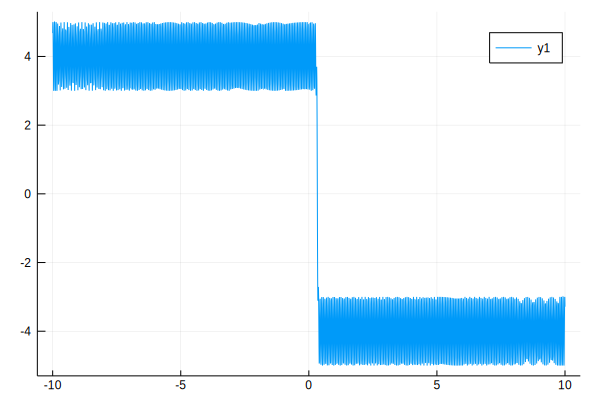

In [8]:
plot(f19, -10, 10)

Metoda bisekcji działa poprawnie.
Metoda Newtona nie działa ponieważ pochodna jest większa od 1.
Metoda Siecznych nie działa poniważ za długo zbiega do miejsca zerwoego 

# Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym przykładzie, dla którego nie działają

Bisekcja działa zawsze, jedynie może mieć bardzo wolny krok. Szczególnie w przypadku, kiedy miejsce zerowe jest bardzo blisko środka przedziału, wtedy działa bardzo wolono.

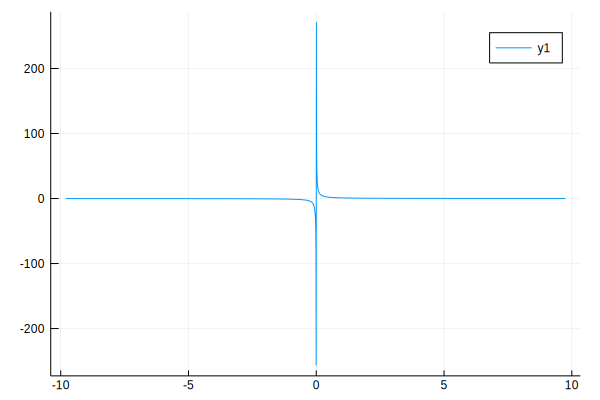

In [49]:
plot(x -> 1/x, -10, 10)

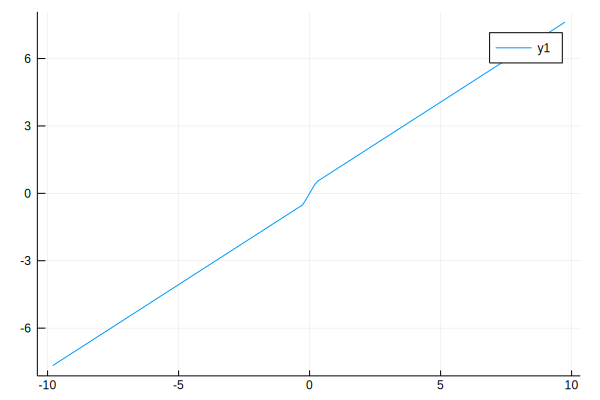

In [44]:
# Metoda Newtona
plot(f[6], -10, 10)

Metoda Newtona wpada tutaj w cykl

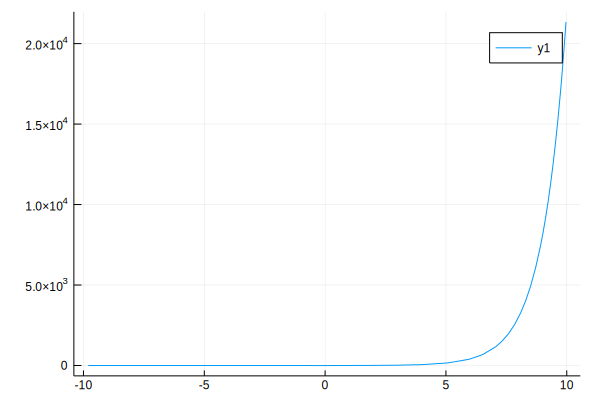

In [58]:
# Metoda siecznych
plot(f[5], -10, 10)

Metoda siecznych zawodzi tutaj ponieważ funkcja jest zbyt stroma i skończona precyzja nie przybliza nas do rozwiązania

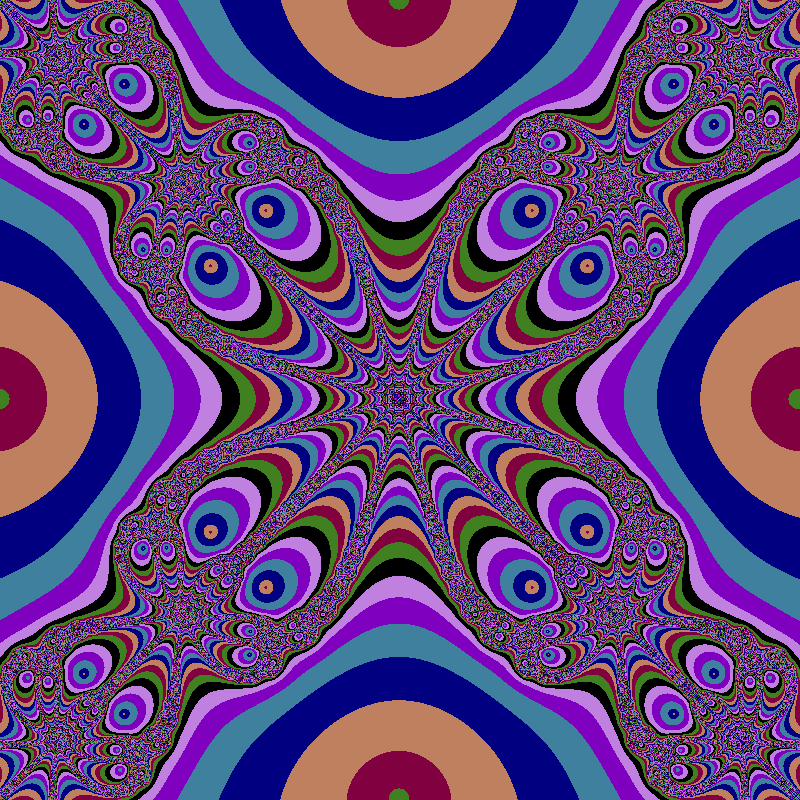

In [28]:
imgx = 800
imgy = 800
A = rand(3, imgx, imgy)



xa = -1.0
xb = 1.0
ya = -1.0
yb = 1.0

maxIt = 100
h = 1e-6
eps = 1e-3

function ffun(z)
    return z * z * z * z - 1.0
end

for y = 1:imgy
    zy = y * (yb - ya) / (imgy - 1) + ya
    for x = 1:imgx
        zx = x * (xb - xa) / (imgx - 1) + xa
        z = complex(zx, zy)
        k = 0
        for i = 1:maxIt
            dz = (ffun(z + complex(h, h)) - ffun(z)) / complex(h, h)
            z0 = z - ffun(z) / dz
            if abs(z0 - z) < eps
                break
            end
            z = z0
            k = i
        end
        r, g, b = k % 2 * 128, k % 4 * 64, k % 8 * 32
        A[1, x, y] = g / 256
        A[2, x, y] = r / 256
        A[3, x, y] = b / 256
    end
end
img = colorview(RGB, A) 